---
layout: default
---


# Model Visualisation
Chapter Link: [modelvis.amitkaps.com/chapter01](http://modelvis.amitkaps.com/chapter01)   
Author: Amit Kapoor


# Introduction (in R)

## Load libraries and data

In [1]:
setwd('~/Dropbox/github/modelvis/data')

In [2]:
library(repr)
options(repr.plot.width=8, repr.plot.height=5)
options(warn=-1)

In [3]:
suppressMessages(library(glmnet))
library(broom)
library(ggplot2)
library(tidyr)
suppressMessages(library(dplyr))


Attaching package: 'tidyr'

The following object is masked from 'package:Matrix':

    expand



In [1]:
# Set the theme for ggplot
library(ggthemes)
notebook_theme <- theme_fivethirtyeight(base_family = "Courier", base_size = 14) + 
         theme( axis.title = element_text(), legend.position = "right", legend.direction = "vertical" )
theme_set(notebook_theme)

ERROR: Error in eval(expr, envir, enclos): could not find function "theme"


ERROR: Error in eval(expr, envir, enclos): could not find function "theme_set"


In [47]:
theme_set(notebook_theme)

In [7]:
cars <- read.csv("../data/cars_small.csv")

In [8]:
str(cars)

'data.frame':	42 obs. of  6 variables:
 $ brand: Factor w/ 13 levels "Chevrolet","Fiat",..: 1 1 1 1 2 2 2 3 3 4 ...
 $ model: Factor w/ 42 levels "Alto","Alto 800",..: 4 27 28 30 18 17 23 8 15 3 ...
 $ price: int  421 551 468 345 612 700 499 506 414 519 ...
 $ kmpl : num  18.6 18.2 18.2 16.2 14.9 15.7 15.8 14.1 15.3 18 ...
 $ bhp  : int  79 82 82 62 89 112 67 100 70 87 ...
 $ type : Factor w/ 2 levels "Hatchback","Sedan": 1 2 1 1 2 2 1 2 1 2 ...


In [9]:
head(cars)

,brand,model,price,kmpl,bhp,type
1,Chevrolet,Beat,421,18.6,79,Hatchback
2,Chevrolet,Sail,551,18.2,82,Sedan
3,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback
4,Chevrolet,Spark,345,16.2,62,Hatchback
5,Fiat,Linea Classic,612,14.9,89,Sedan
6,Fiat,Linea,700,15.7,112,Sedan


## [0] Visualise the data space

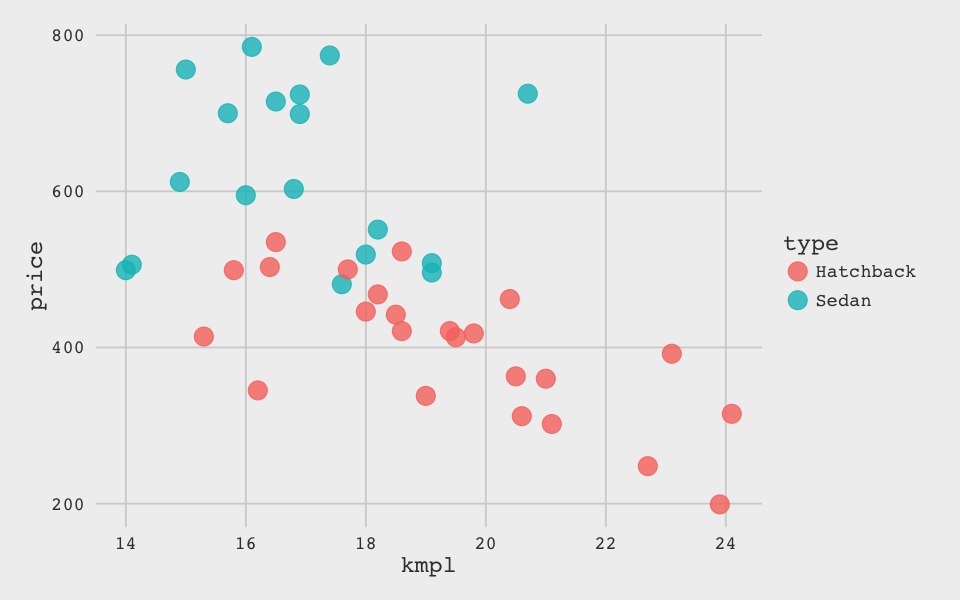

In [48]:
p0 <- ggplot(cars) + aes(kmpl,price, color = type) + geom_point(size = 5, alpha = 0.8)
p0

In [49]:
ggsave('../website/assets/images/01-00-data.png', p0, width = 8, height = 5)

## [1] Visualise the predictions in the data space

In [69]:
lmfit <- lm (price ~ kmpl + type, cars)

In [72]:
carslm <- cars

In [73]:
carslm['pred'] <- predict(lmfit, cars)

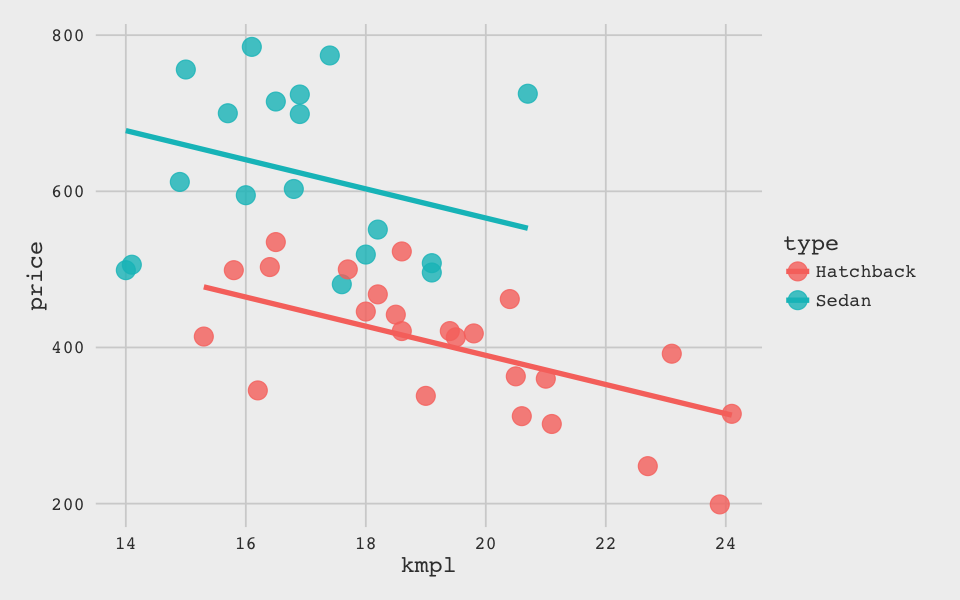

In [80]:
p1 <- ggplot(carslm) + aes(kmpl,price, color = type) + geom_point(size = 5, alpha = 0.8) + 
      geom_line(aes(kmpl, pred, color = type), size = 1.5)
p1

In [114]:
ggsave('../website/assets/images/01-01-prediction.png', p1, width = 8, height = 5)

## [2] Visualise the Errors in Model Fitting

In [83]:
carslm['error'] <- carslm['price'] - carslm['pred']

In [89]:
p2 <- ggplot(carslm) + aes(kmpl,price, color = type) + geom_point(size = 5, alpha = 0.8) + 
      geom_line(aes(kmpl, pred, color = type), size = 1.5) + ylim(13,25)
p3

ERROR: Error in eval(expr, envir, enclos): object 'p3' not found


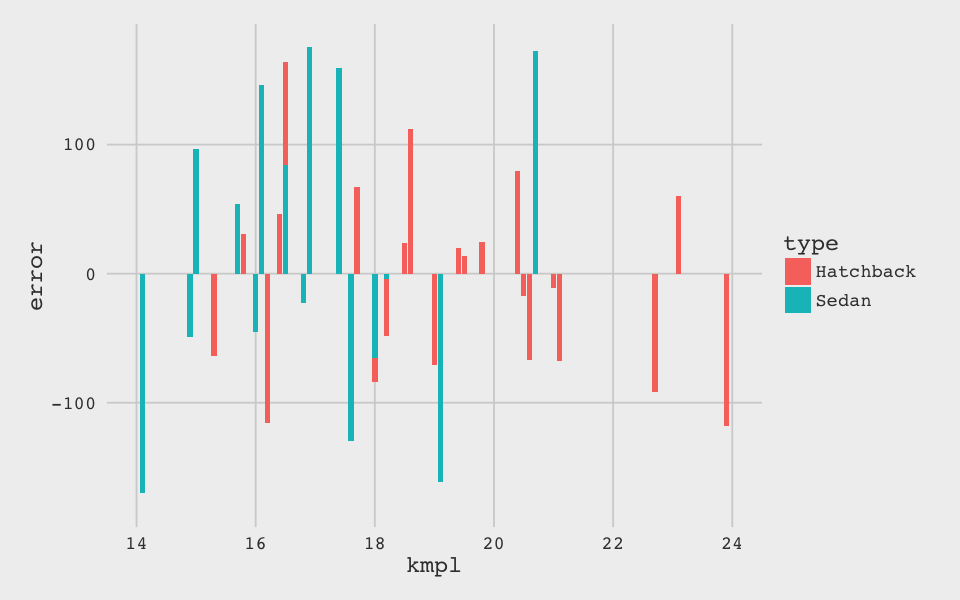

In [92]:
p4 <- ggplot(carslm) + aes(kmpl,error, fill = type) + geom_bar(stat = "identity") + xlim(14,24)
p4

In [115]:
ggsave('../website/assets/images/01-02-errors.png', p4, width = 8, height = 5)

## [3] Visualise with different model parameters

In [123]:
ridgefit <- lm.ridge(price ~ kmpl + type, cars,lambda = seq(0,0.1,0.001))

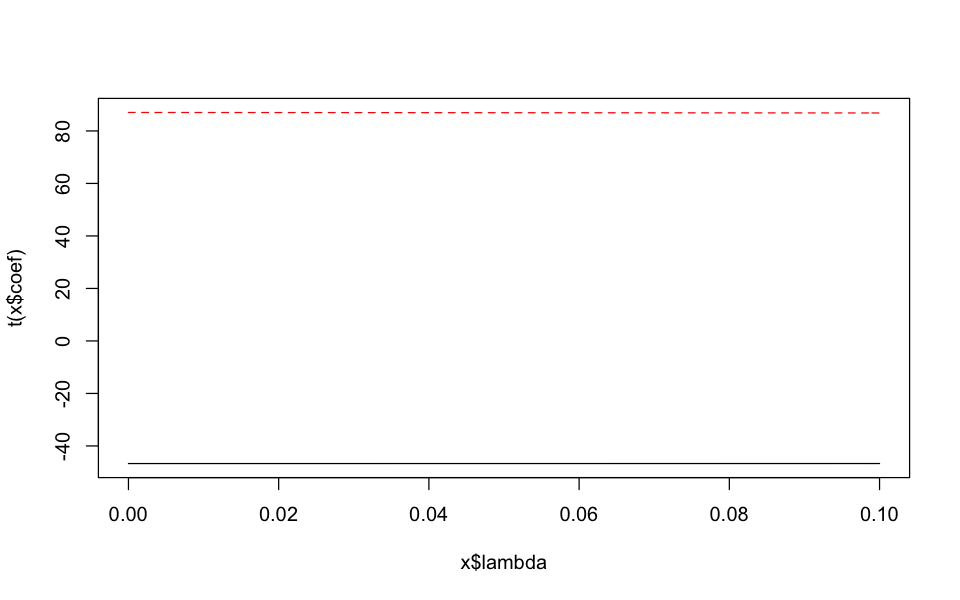

In [125]:
plot(ridgefit)

## [4] Visualise with different input datasets

In [110]:
bootcars <- cars %>% 
            bootstrap(2) %>%
            do(augment(lm(.$price ~.$kmpl + .$type), .))

In [113]:
p6 <- ggplot(bootcars) + aes(kmpl, price, color = type) + geom_point(size = 5, alpha = 0.1) +
             geom_line(aes(y=reorder(.fitted, kmpl), group=replicate), alpha=1)
p6

ERROR: Error: Discrete value supplied to continuous scale


ERROR: Error in file(con, "rb"): cannot open the connection


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title